## COMP5721M: Programming for Data Science 

## Coursework 3: Data Analysis Project

Last modified: 15 November 2023

# Analysis Of Youtube Trending Data


_Give names and emails of group members here:_

* Asish Panda, mm23ap@leeds.ac.uk
* Mohamed Imthiyas Abdul Rasheeth, mm23m2ia@leeds.ac.uk
* Naveen Sabarinath Babu, mm23nsb@leeds.ac.uk
* Roshan ., mm23rt@leeds.ac.uk

# Project Requirements
_PLEASE DELETE THIS WHOLE CELL BEFORE SUBMITTING YOUR PROJECT_

The purpose of this assignment is to develop your skills
in organising and presenting a Data Science project.

Since most of the marks will be awarded for organisation
and presentation, it is suggested that you do not initially attempt
anything too complicated. However, once you have managed
to get a basic pipeline working that fits the guidelines, 
you are encouraged to extend and elaborate your analysis.

Your project should entirely be contained within this template file.
You should keep the basic structure indicated below. To facilitate
grading according to the marking scheme.

You _may_ import any module that is provided with Anaconda3 Python.


### Marking Scheme

The marking scheme  is as follows:

* Project Plan:
    * Description of data to be used (10)
    * Overview of Project Aims  (5)
    * Design  (5)
    
* Program Code: (15)<br>
    Code should be laid out in steps with explanations
    and intermediate output with comments. 
    You should ensure that the steps do not require
    a large amount of processing time.

* Project Outcome:
    * Explanation of Results (10)<br>
        This should include a qualitative description
        of the results as well as key figures and tables
        of results.
    * Results visualisation (10)<br>
        This should be graphical representations of the
        results with brief explanations (ordinary tables will be
        graded as part of the explanation of results)
    * Conclusion (5)

### Data Resources

You can use any data you like. Many useful resources are available.

The Data Resources section of the module (Unit 4.3 on Minerva) has links to several example data sets.

As a starting point you could browse the following:
* [Kaggle](https://www.kaggle.com/)
* [Our World in Data](https://ourworldindata.org/)
* [scikit-learn datasets](https://scikit-learn.org/stable/datasets.html)
* [scikit-learn tutorial](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)




### Using this Notebook Template
Please use this notebook as a template for your project file.
In the following cells of the notebook, _italic text_ giving explanations
and examples should be either deleted, or, in most cases, replaced by appropriate text describing your project. 
Text that is not in italic (which is mostly headings) should
be left as it is. __Your project report notebook should the same overall
structure as this template notebook.__
An exception to this is the current markup cell describing the project
requiements. You should delete this before submitting your notebook.

# Project Plan

## The Data (10 marks)

Youtube provides an API that provides information about trendng data country-wise. The dataset on Kaggle is a real-time (daily) updating dataset derived from the API consisting of attruibutes for various contries which is used for analysis in this project. The scope of this project limits our use to a specific daterange and limited the country to Great Britain.

The dataset consists of two files , _GB_category_id.json and GB_youtube_trending_data.csv_. The files contain the follwoing column ID's

### CSV:

 ['video_id',
 'title',
 'publishedAt',
 'channelId',
 'channelTitle',
 'categoryId',
 'trending_date',
 'tags',
 'view_count',
 'likes',
 'dislikes',
 'comment_count',
 'thumbnail_link',
 'comments_disabled',
 'ratings_disabled',
 'description']

### JSON:

The json file contains a data structure that links the categoryId column in each file. The json file alos ha sinformation about each files category i.e ['family','Entertainment','Education']. The structure of the file is as follows

```
{
    "kind": "youtube#videoCategoryListResponse",
    "etag": "kBCr3I9kLHHU79W4Ip5196LDptI",
    "items": [
        {
            "kind": "youtube#videoCategory",
            "etag": "IfWa37JGcqZs-jZeAyFGkbeh6bc",
            "id": "1",
            "snippet": {
                "title": "{{category_string}}",
                "assignable":{{boolean}},
                "channelId": "{{string}}"
            }
        },
        {
            "kind": "youtube#videoCategory",
            "etag": "5XGylIs7zkjHh5940dsT5862m1Y",
            "id": "2",
            "snippet": {
                "title": "{{category_string}}",
                "assignable": {{boolean}},
                "channelId": "{{string}}"
            }
        },
	]
}
```

## Project Aim and Objectives (5 marks)

The primary objective of this project is to perform an in-depth analysis of the "Trending Youtube API Dataset" to identify and understand the important attributes that results in the uploaded video to be "trending" in the platform. The project aims to find the patterns in the dataset that would push the videos, uploaded by the users, into the trending category; thus helping the content creators to optimize their video uploads accordingly that would contribute to the Youtube Algorithm.

The aim of the project is achieved by making use of data analysis techniques and machine learning algorithms to find out the correlations between the different attributes in the dataset. We will make use of columns such as {categoryId, title,view_count,likes,dislikes etc.} to recognize the patterns resulting in a trending video. After thorough analysis of the various aspects, we aim to discern the commonalities among the trending videos, while also identifying the factors that may vary across the different genres of Youtube. 

In summary, the project aims to provide insight into the dynamics of Youtube Trending videos, thereby helping content creators in sharing content that would satisfy the Youtube algorithm and results in the video being in the Youtube Trending. The results will help in improving the experience of the users and Youtubers on the Youtube Platform.

#_Here you should describe the general aim of your project in
around 200-300 words._

#_This can can be anything from classifying items according to
their characteristic features (which mushrooms are poisonous?) 
to simulating an evolving process (will the rabbits eat all
the carrots or get eaten by the foxes?)_

#_Here some ideas of general types of processing functionality
that you could implement:_

* _Classification: separate data items into classes according
  to their charactersitics (can be either a definite or a
  statistical kind of classification)_
* _Corellation: find correspondences between different attributes within
  a dataset_
* _Search: find solutions matching some criteria_
* _Visualisation: find informative ways to
  display the structure of a large and/or complex dataset_
* _Query Answering: create a system that enables one to retrieve information by evaluating some form of query representation_
* _Simulation: model the evolution of a complex process_

### Specific Objective(s)

_You should chose and list __up to 4__ specific objectives suited to the data you will be working with and the type of project you wish to carry out. 
There should be <b>at least one
per person doing the project</b>. There is no need
for  the objectives them to be completely different. 
They could be different
stages of the processing requirements, or different processing
functions that the system  provides. Or just
different aspects of data analysis that will be conducted.
Typically, it is expected that there would be one objective
per person. Replace the following examples with your own objectives:_

* __Objective 1:__ _Visualize the genres that trend in the United Kingdom_
* __Objective 2:__ _Checks the key words to be used in the Title and/or Description for a video to be in the trending category_
* __Objective 3:__ _Calculates whether the Likes, Dislikes and View Count influences a video to trend_
* __Objective 4:__ _Check whether the upload date and time results in a video to trend_

## System Design (5 marks)

_Describe your code in terms of the
following two sections._

### Architecture

_Typically this would be  a pipeline in which data goes through several
stages of transformation and analysis, but other architectures are possible.
This does not need to be particularly complicated. A simple diagram with
100-150 words of explanation would
be a good way to present your architecture._
  
### Processing Modules and Algorithms

_Briefly list and describe the most significant computational components of your system and the algorithms you will use to implement them. 
This could include things like:_

* _cleaning the data by removing outliers_
* _combining different datasets_
* _converting samples to a special representaion (such as feature vectors)_
* _constructing a special data-structure (such as a decision tree)_
* _running some kind of analysis_

_Your list can be presented in similar form to the one just given, 
but should include a brief
but more specific description of the components and/or algorithms.
Probably three or four components is sufficient for most projects, but
you may want to have more._

# Program Code (15 marks)

## Module Imports

We are importing ```pandas``` since it is used for DataFrame operations. Along ith Pandas, we are alos using the built-in ```json``` to import our ```GB_category_id.json```

In [16]:
import pandas as pd
import json
import matplotlib.pyplot as plt

### Reading And Combining the two files

In the following code block, we read the csv and transform it into a pandas dataframe called ```dataframe_csv```. We then read the json file into a vaariable called ```categories```. We then select the category title from ```categories``` and append it into a new column in the ```dataframe_csv``` dataframe.

In [17]:

dfc= pd.read_csv('GB_youtube_trending_data.csv')
df =pd.DataFrame(dfc)

# Load the categories
with open('GB_category_id.json') as f:
    categories = json.load(f)

# Create a dictionary to map category IDs to category names
category_dict = {int(item['id']): item['snippet']['title'] for item in categories['items']}

# Map the category IDs in the dataframe to the category names
df['category'] = df['categoryId'].map(category_dict)

df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category
0,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353790,2628,40228,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,Entertainment
1,9nidKH8cM38,TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS',2020-08-11T20:00:45Z,UCFMbX7frWZfuWdjAML0babA,Eleanor Neale,27,2020-08-12T00:00:00Z,eleanor|neale|eleanor neale|eleanor neale true...,236830,16423,209,1642,https://i.ytimg.com/vi/9nidKH8cM38/default.jpg,False,False,The first 1000 people to click the link will g...,Education
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",Gaming
3,kgUV1MaD_M8,Nines - Clout (Official Video),2020-08-10T18:30:28Z,UCvDkzrj8ZPlBqRd6fIxdhTw,Nines,24,2020-08-12T00:00:00Z,Nines|Trapper of the year|Crop Circle|Nines Tr...,613785,37567,669,2101,https://i.ytimg.com/vi/kgUV1MaD_M8/default.jpg,False,False,Nines - Clout (Official Video)Listen to Clout ...,Entertainment
4,49Z6Mv4_WCA,i don't know what im doing anymore,2020-08-11T20:24:34Z,UCtinbF-Q-fVthA0qrFQTgXQ,CaseyNeistat,22,2020-08-12T00:00:00Z,[None],940036,87113,1860,7052,https://i.ytimg.com/vi/49Z6Mv4_WCA/default.jpg,False,False,ssend love to my sponsor; for a super Limited ...,People & Blogs


After combining both files into a single dataframe, we proceed withour initial data exploration. 

In [18]:
df.shape

(238191, 17)

In the previous code block, we take note that there are ```17``` features and ```155964``` trending videos. To ensure correct analysis we check for number of missing numbers in each column and summing it columnwise.

In [19]:
df.isna().sum()

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          4279
category              102
dtype: int64

From the above output we can see there are ```4281``` missing descriptions and ```102``` missing categories. Since missing values in the columns won't cause problems in our analysis, we will not drop those rows.

### Duplicate Check

We then check for duplicate rows in the dataframe using the ```duplicated()``` function of pandas. We then sum up the total to see how many rows are duplicates. From the result 124 rows are duplicates.

In [20]:
df.duplicated().sum()

124

We can use ```drop_duplicates()``` function to drop those rows. We can then check the shape of the dataframe to cross verify that the duplicates were successfully deleted.

In [21]:
df = df.drop_duplicates()
df.shape

(238067, 17)

### Objective 1 Code Cells: _Visualize the genres that trend in the United Kingdom_ 

The following barplot shows us the count of the categories occuring in the dataset.
As we can see from figure 1, Entertainment tops the list, followed by Sports, Gaming, Music and People & Blogs as Top 5 Categories across the dataset for the year between Aug 2020 to Nov 2023.

<Axes: title={'center': 'Fig.1 - No. of Videos per Category'}, xlabel='Category', ylabel='Number of Trending Videos'>

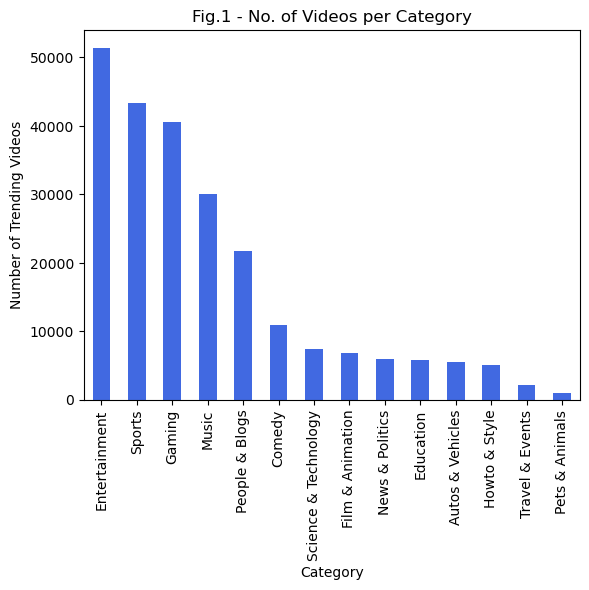

In [33]:
df['category'].value_counts().plot.bar(title='Fig.1 - No. of Videos per Category',xlabel='Category',ylabel='Number of Trending Videos',color='royalblue')


We can then convert the trending_date column in the dataframe into datetime format and store it in a new column called date. Further columns are created based on year and month to aide in plotting. We can then label the month from integers to their names in english to enhance clarity. A graph is then plotted based on category and month.

<Axes: xlabel='month'>

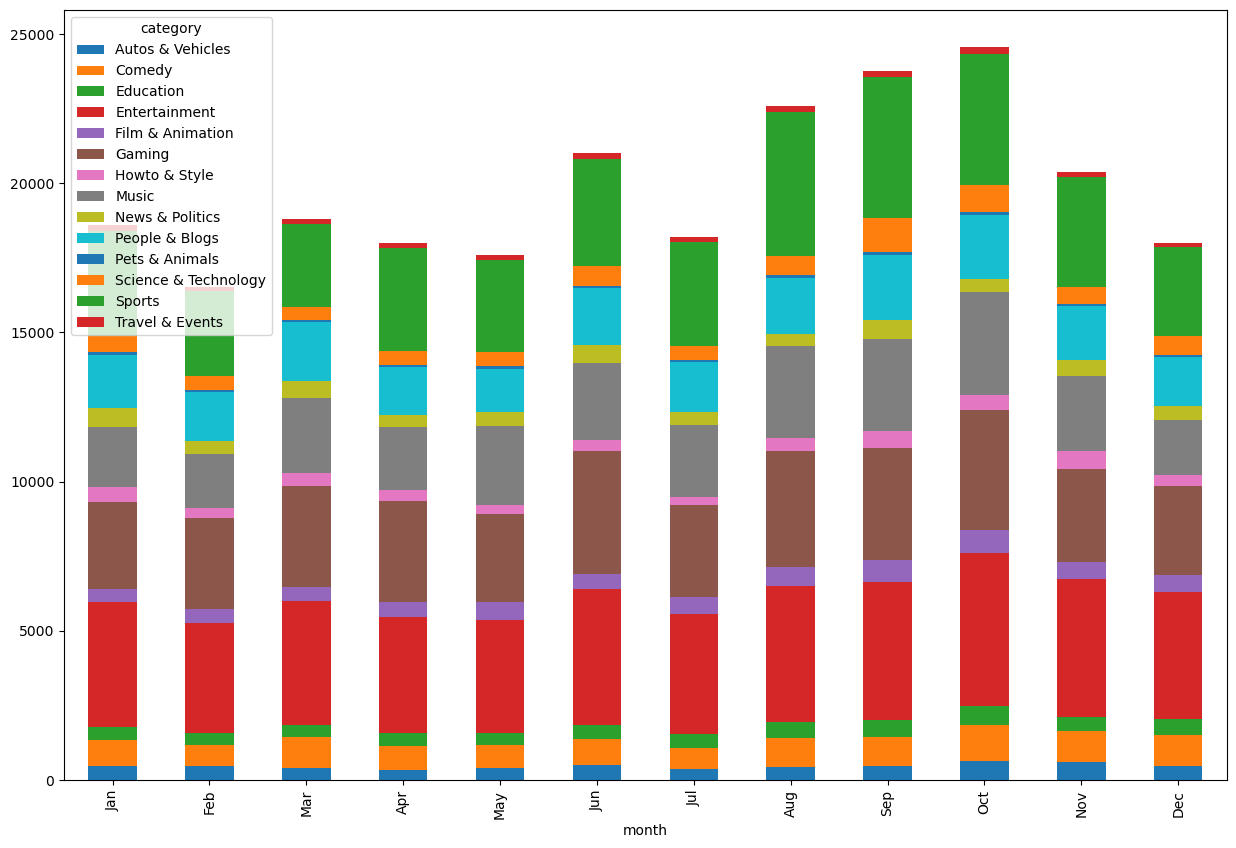

In [37]:
# plot bar graph based on category and date by month
df['date'] = pd.to_datetime(df['trending_date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['month'] = df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
df['month'] = pd.Categorical(df['month'], categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ordered=True)
#plot bar graph based on category and date by month
df.groupby(['month','category']).size().unstack().plot(kind='bar',stacked=True,figsize=(15,10))

The dataframe is further filtered to the Top 5 categories as per Figure 1.  

<Axes: xlabel='year,year'>

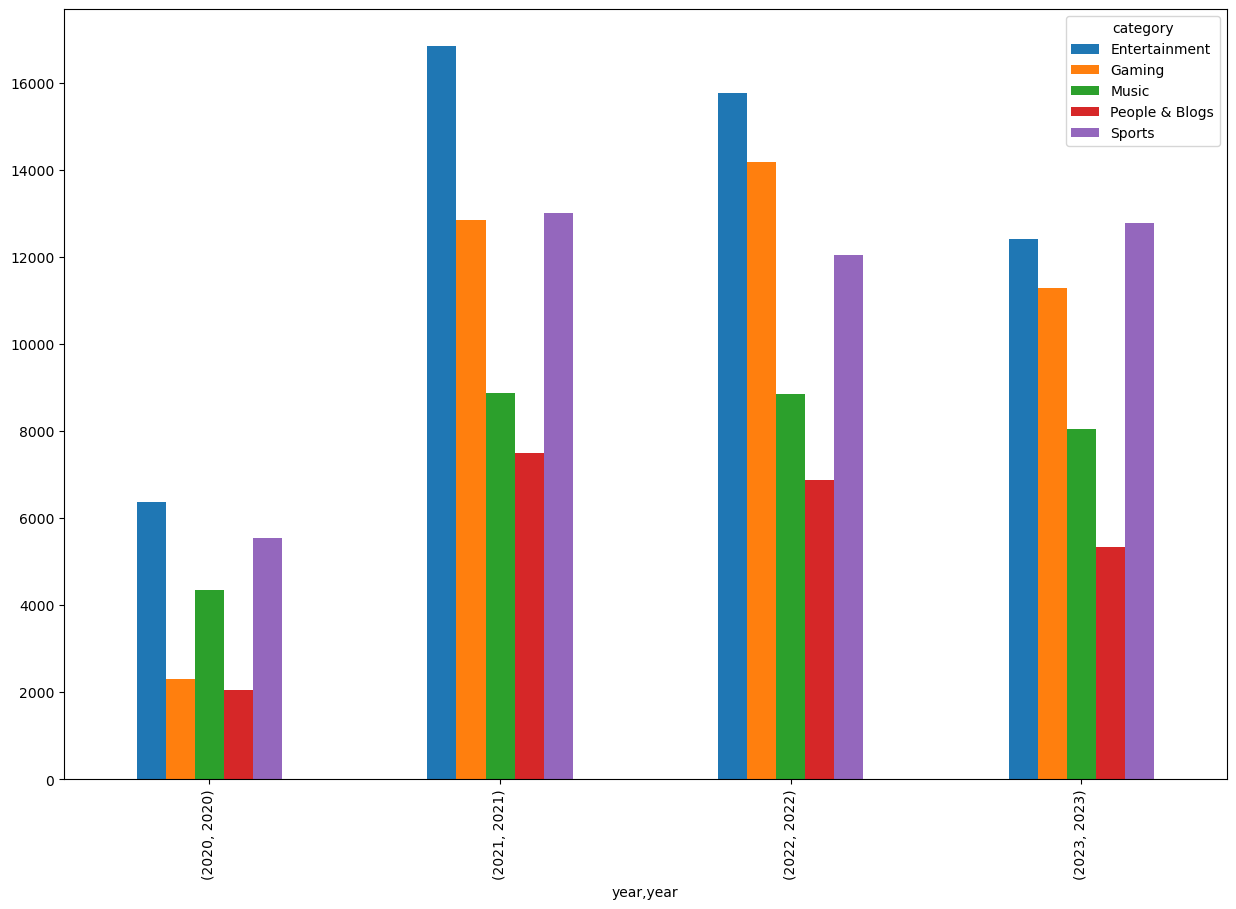

In [40]:
# plot grouped bar graph for top 5 category per year
df.groupby(['year','category']).size().groupby(level=0).nlargest(5).unstack().plot(kind='bar',stacked=False,figsize=(15,10)) 

### Objective 2 Code Cells:  _Checks the key words to be used in the Title and/or Description for a video to be in the trending category_

To aide in our understanding of how keywords in title affect a videos abilty to trend, we use an external python module called ```worldcloud```. This will allow us to visualize frequently mentioned words in the title.

In [25]:
from wordcloud import WordCloud

In [26]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category,date,month,year
0,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353790,2628,40228,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,Entertainment,2020-08-12 00:00:00+00:00,Aug,2020
1,9nidKH8cM38,TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS',2020-08-11T20:00:45Z,UCFMbX7frWZfuWdjAML0babA,Eleanor Neale,27,2020-08-12T00:00:00Z,eleanor|neale|eleanor neale|eleanor neale true...,236830,16423,209,1642,https://i.ytimg.com/vi/9nidKH8cM38/default.jpg,False,False,The first 1000 people to click the link will g...,Education,2020-08-12 00:00:00+00:00,Aug,2020
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",Gaming,2020-08-12 00:00:00+00:00,Aug,2020
3,kgUV1MaD_M8,Nines - Clout (Official Video),2020-08-10T18:30:28Z,UCvDkzrj8ZPlBqRd6fIxdhTw,Nines,24,2020-08-12T00:00:00Z,Nines|Trapper of the year|Crop Circle|Nines Tr...,613785,37567,669,2101,https://i.ytimg.com/vi/kgUV1MaD_M8/default.jpg,False,False,Nines - Clout (Official Video)Listen to Clout ...,Entertainment,2020-08-12 00:00:00+00:00,Aug,2020
4,49Z6Mv4_WCA,i don't know what im doing anymore,2020-08-11T20:24:34Z,UCtinbF-Q-fVthA0qrFQTgXQ,CaseyNeistat,22,2020-08-12T00:00:00Z,[None],940036,87113,1860,7052,https://i.ytimg.com/vi/49Z6Mv4_WCA/default.jpg,False,False,ssend love to my sponsor; for a super Limited ...,People & Blogs,2020-08-12 00:00:00+00:00,Aug,2020


In [27]:
#find the average length of title in words
df_test3 = df.copy()
df_test3['title_length'] = df_test3['title'].str.split().str.len()
df_test3['title_length'].mean()



9.045142753930616

<Axes: ylabel='Frequency'>

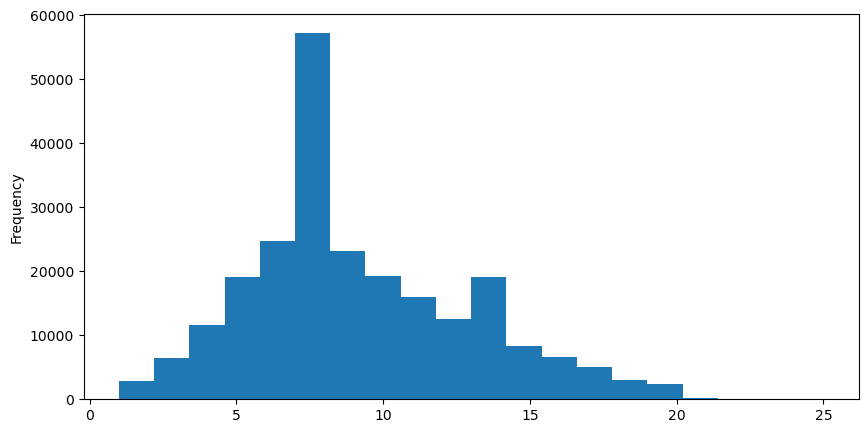

In [28]:
df_test3['title_length'].plot.hist(bins=20,figsize=(10,5))

In [29]:
#plot word cloud for title



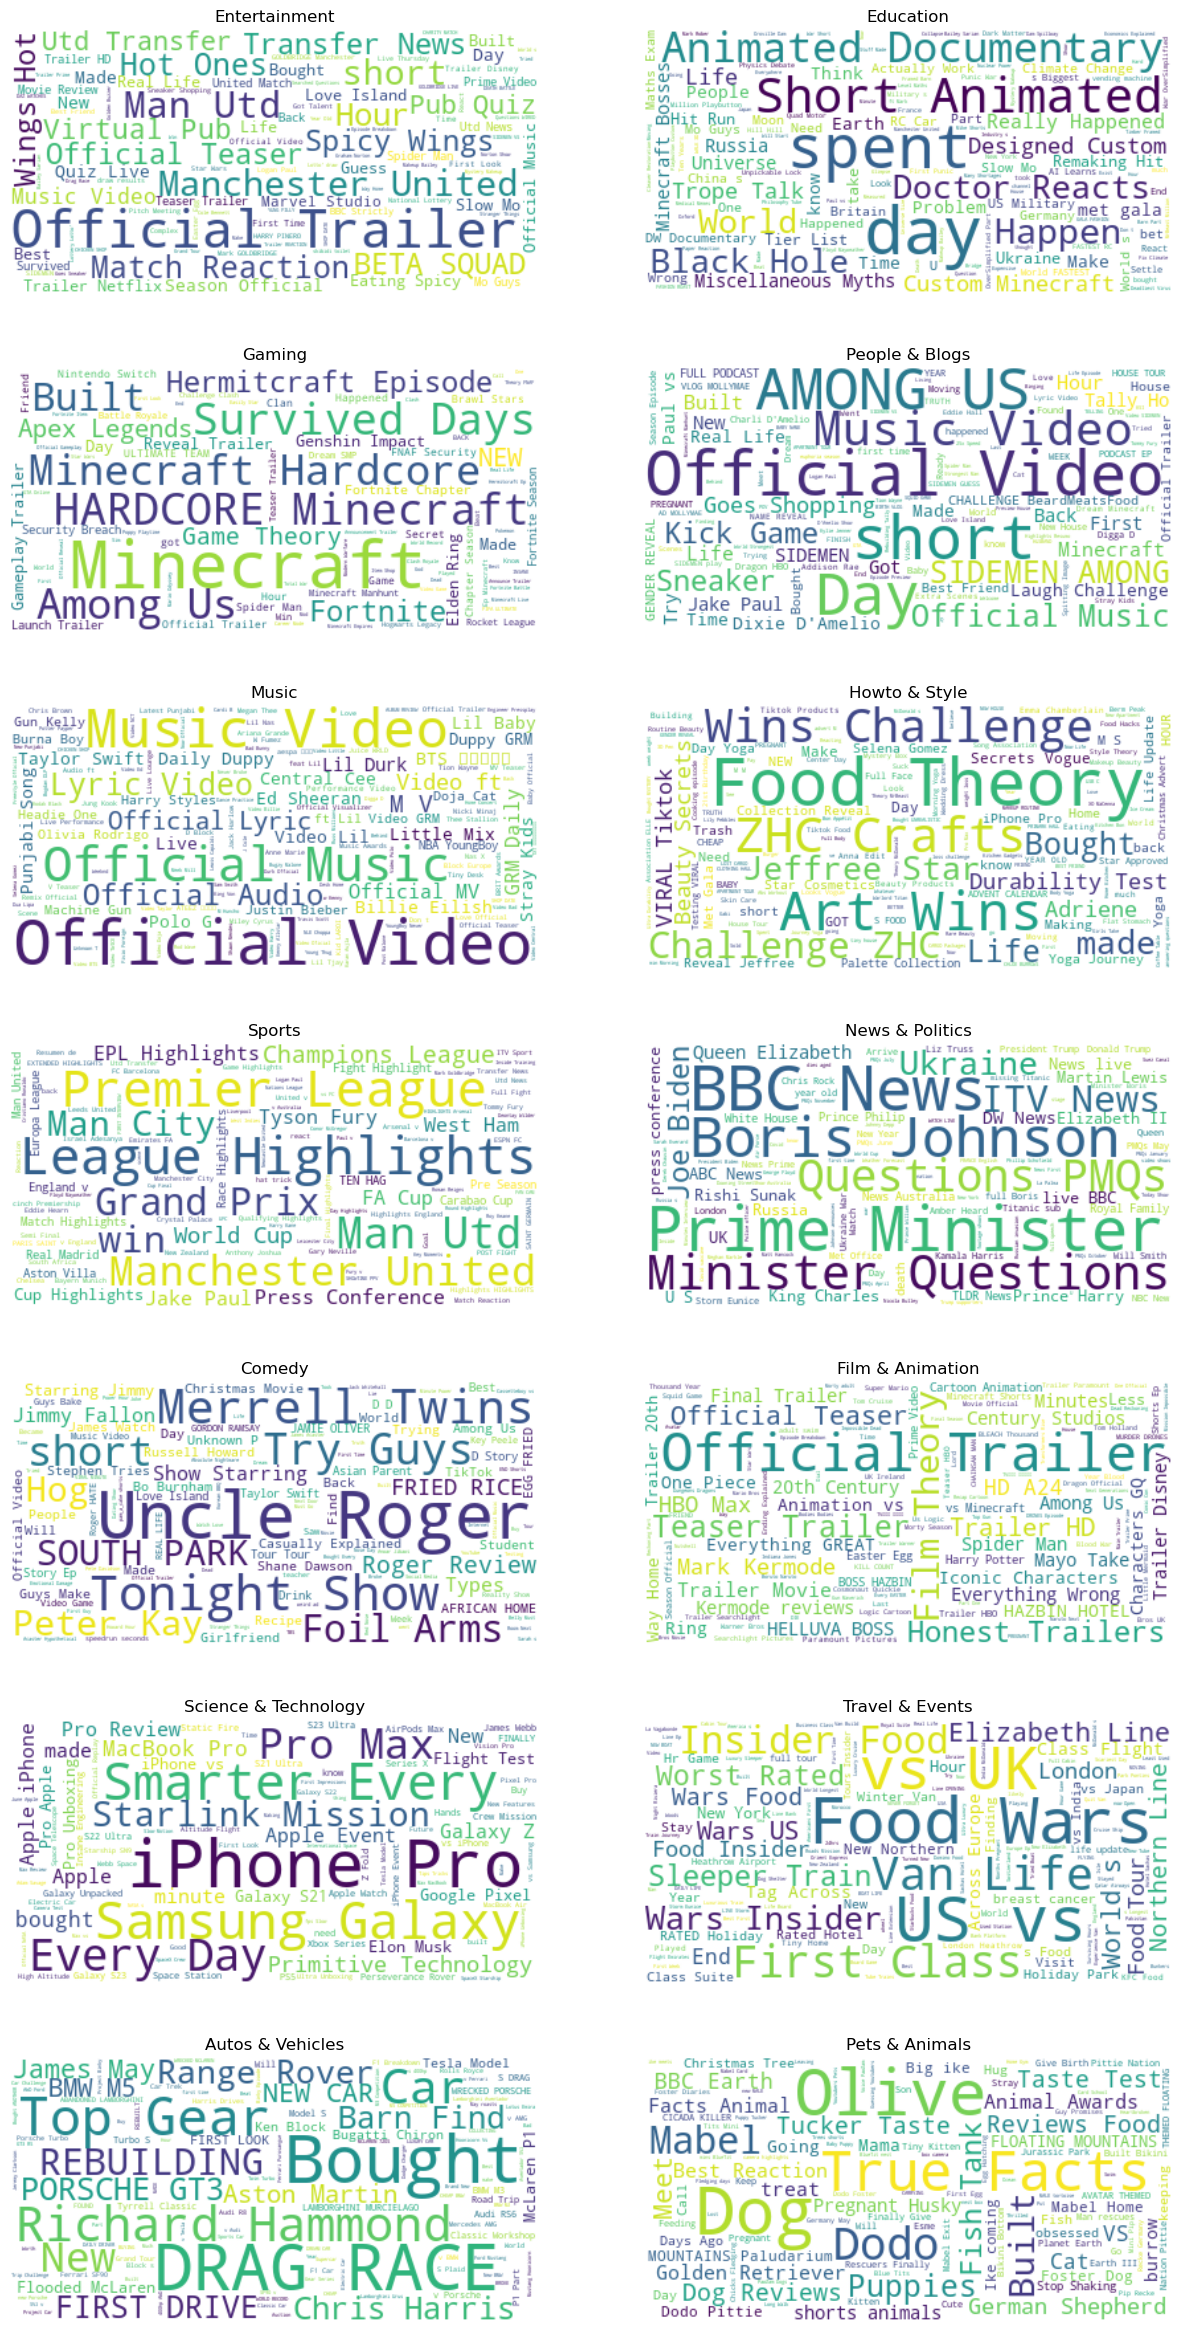

In [30]:
# Multiple graphs in the same cell
fig, axes = plt.subplots(7, 2, figsize=(15, 30))

# Get unique categories
categories = df_test3['category'].unique()

# Limit the number of categories to the number of subplots
categories = categories[:len(axes.flatten())]

# Plot the wordcloud for each category
for i, ax in enumerate(axes.flatten()):
    category = categories[i]
    title = df_test3[df_test3['category'] == category]['title']
    text = ' '.join(title)
    if text != ' ':
        wordcloud = WordCloud(max_font_size=50, max_words=10000, background_color="white").generate(text)
        ax.imshow(wordcloud, interpolation="bilinear")
        ax.set_title(category)
        ax.axis("off")

In [31]:
len(df['category'].value_counts())

14

### Objective 3 Code Cells


In [32]:
#find column names of dataframe
df.columns
As you can see in the figure 3, we have taken the top five trending categories and grouped it yearwise. 
We can see a downtrend in Entertainment from year 2021 to year 2023, while Gaming categories uprises and Music, People & Blogs and Sports have almost stayed constant.


SyntaxError: invalid syntax (3695332163.py, line 3)

Drop unnecessary columns

In [ ]:
#drop columns that are not needed - video_id, channelId, tags, channelTitle, comment_count, thumbnail_link, comments_disabled, ratings_disabled, date, month, year
df_ob3 = df.copy()
df_ob3 = df.drop(['video_id','channelId','tags','channelTitle','comment_count','thumbnail_link','comments_disabled','ratings_disabled','date','month','year','description'], axis=1)
df_ob3.head()

,title,publishedAt,categoryId,trending_date,view_count,likes,dislikes,category
0,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,24,2020-08-12T00:00:00Z,2038853,353790,2628,Entertainment
1,TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS',2020-08-11T20:00:45Z,27,2020-08-12T00:00:00Z,236830,16423,209,Education
2,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,20,2020-08-12T00:00:00Z,2381688,146739,2794,Gaming
3,Nines - Clout (Official Video),2020-08-10T18:30:28Z,24,2020-08-12T00:00:00Z,613785,37567,669,Entertainment
4,i don't know what im doing anymore,2020-08-11T20:24:34Z,22,2020-08-12T00:00:00Z,940036,87113,1860,People & Blogs


Relation between number of likes and number of views is almost synonymous

In [ ]:
#Create a plot to show the relationship between the number of views and the number of likes anc colour by  top 5 category

#df_ob3.plot.scatter(x='view_count', y='likes', c='categoryId', figsize=(10,10))
#df_ob3.plot.scatter(x='view_count', y='likes', figsize=(10,10))

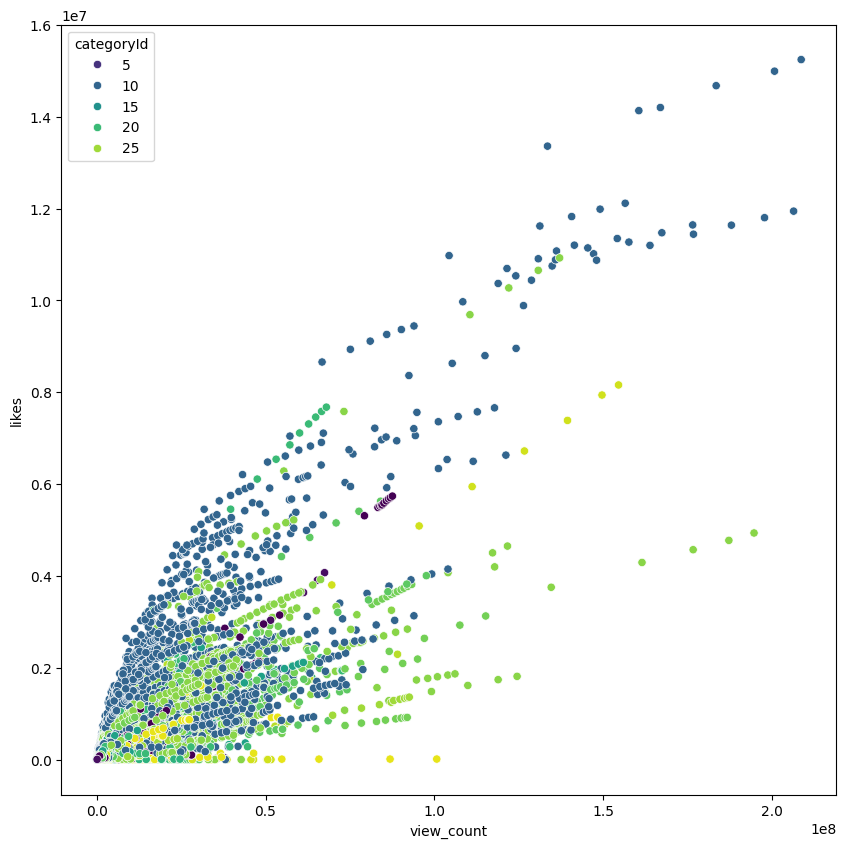

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.scatterplot(data=df_ob3, x='view_count', y='likes', hue='categoryId', palette='viridis')
plt.show()

In [ ]:
#create a dictionary to map category names to category IDs
category_dict2 = {item['snippet']['title']: int(item['id']) for item in categories['items']}
category_dict2



{'Film & Animation': 1,
 'Autos & Vehicles': 2,
 'Music': 10,
 'Pets & Animals': 15,
 'Sports': 17,
 'Short Movies': 18,
 'Travel & Events': 19,
 'Gaming': 20,
 'Videoblogging': 21,
 'People & Blogs': 22,
 'Comedy': 34,
 'Entertainment': 24,
 'News & Politics': 25,
 'Howto & Style': 26,
 'Education': 27,
 'Science & Technology': 28,
 'Movies': 30,
 'Anime/Animation': 31,
 'Action/Adventure': 32,
 'Classics': 33,
 'Documentary': 35,
 'Drama': 36,
 'Family': 37,
 'Foreign': 38,
 'Horror': 39,
 'Sci-Fi/Fantasy': 40,
 'Thriller': 41,
 'Shorts': 42,
 'Shows': 43,
 'Trailers': 44}

In [ ]:
len(category_dict2)

30

Relation between view count and category

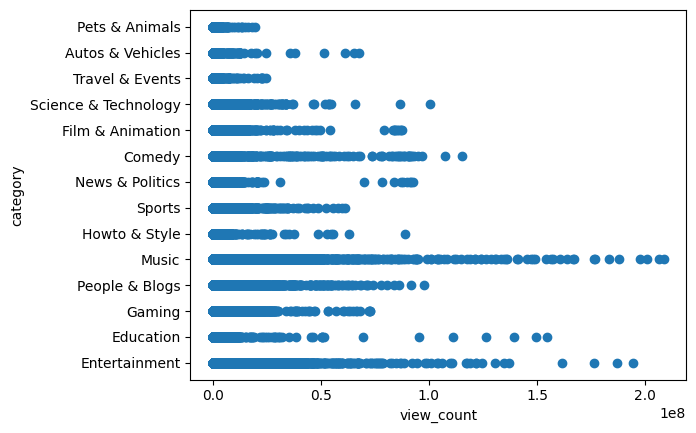

In [ ]:
df_ob3 = df_ob3.dropna()

plt.scatter(df_ob3['view_count'],df_ob3['category'].astype(str))
plt.xlabel('view_count')
plt.ylabel('category')
plt.show()


Relation between likes and category

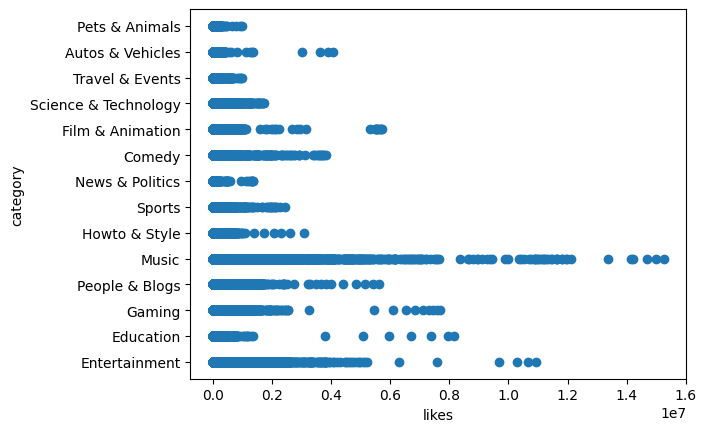

In [ ]:
plt.scatter(df_ob3['likes'],df_ob3['category'].astype(str))
plt.xlabel('likes')
plt.ylabel('category')
plt.show()


These two graphs shows almost similar results, so looking from the perspective of view_count alone avails similar results. We chose view count since the the values are generally higher

In [ ]:
df_ob3['category'].value_counts()

category
Entertainment           34646
Sports                  27364
Gaming                  25787
Music                   19808
People & Blogs          14647
Comedy                   7581
Science & Technology     4973
Film & Animation         4346
News & Politics          4296
Howto & Style            3800
Education                3742
Autos & Vehicles         2951
Travel & Events          1166
Pets & Animals            641
Name: count, dtype: int64

In [ ]:
df_ob3.describe()

,categoryId,view_count,likes,dislikes
count,155748.000000,1.557480e+05,1.557480e+05,155748.000000
mean,19.233660,2.275392e+06,1.225437e+05,1680.633100
std,6.260749,6.023273e+06,3.737851e+05,9507.673381
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,17.000000,3.586508e+05,1.219900e+04,0.000000
50%,20.000000,8.308025e+05,3.738600e+04,161.000000
75%,24.000000,1.999543e+06,1.034002e+05,878.000000
max,28.000000,2.085815e+08,1.524651e+07,865075.000000


In [ ]:
df_ob3['view_count'].max()

208581468

In [ ]:
df_ob3['view_count'].min()

0

In [ ]:
df_ob3['view_count'].mean()

2275391.645940879

In [ ]:
df_ob3[df_ob3['view_count'] > df_ob3['view_count'].mean()].count()

title            34282
publishedAt      34282
categoryId       34282
trending_date    34282
view_count       34282
likes            34282
dislikes         34282
category         34282
dtype: int64

In [ ]:
df_ob3['title'][df_ob3['view_count'] == 0].count()

88

Here we see 88 videos have made it to the trending dataset with 0 view count, so these can be considered as anomalies. From graphs, higher the view count -> more chances of it being recommended to users in that particular category than the ones with lower view count.

In [ ]:
df_ob3['title'][df_ob3['likes'] > df_ob3['likes'].mean()].count()

33454

In [ ]:
df_ob3['likes'].max()

15246514

In [ ]:
df_ob3.groupby('category')['likes'].mean()

category
Autos & Vehicles         46146.390376
Comedy                  134384.224245
Education               115192.641635
Entertainment           133690.506350
Film & Animation        117634.440865
Gaming                  105240.999147
Howto & Style            71508.087632
Music                   314472.241014
News & Politics          20809.678305
People & Blogs          109975.862224
Pets & Animals           59317.993760
Science & Technology    103965.884175
Sports                   30477.221020
Travel & Events          45432.402230
Name: likes, dtype: float64

In [ ]:
df_ob3.groupby('category')['view_count'].mean()

category
Autos & Vehicles        1.067683e+06
Comedy                  2.179094e+06
Education               2.138009e+06
Entertainment           2.563865e+06
Film & Animation        2.644088e+06
Gaming                  1.878688e+06
Howto & Style           1.424122e+06
Music                   4.441473e+06
News & Politics         1.514755e+06
People & Blogs          2.145009e+06
Pets & Animals          1.337051e+06
Science & Technology    2.462806e+06
Sports                  1.184309e+06
Travel & Events         9.661348e+05
Name: view_count, dtype: float64

In [ ]:
#create a new column where, if the number of likes is greater than the mean, the value is 1, otherwise 0

df_ob3['likes_mean'] = (df_ob3['likes'] > df_ob3['likes'].mean()).astype(int)
df_ob3.head()


,title,publishedAt,categoryId,trending_date,view_count,likes,dislikes,category,likes_mean
0,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,24,2020-08-12T00:00:00Z,2038853,353790,2628,Entertainment,1
1,TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS',2020-08-11T20:00:45Z,27,2020-08-12T00:00:00Z,236830,16423,209,Education,0
2,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,20,2020-08-12T00:00:00Z,2381688,146739,2794,Gaming,1
3,Nines - Clout (Official Video),2020-08-10T18:30:28Z,24,2020-08-12T00:00:00Z,613785,37567,669,Entertainment,0
4,i don't know what im doing anymore,2020-08-11T20:24:34Z,22,2020-08-12T00:00:00Z,940036,87113,1860,People & Blogs,0


(i) Relation between Likes_mean and cateogry
(ii) Relation between 50th quantile of likes and category
(iii) Relation between view counts mean and category
(iv) Relation between 50th quantile of view counts and category

<Axes: xlabel='likes_mean'>

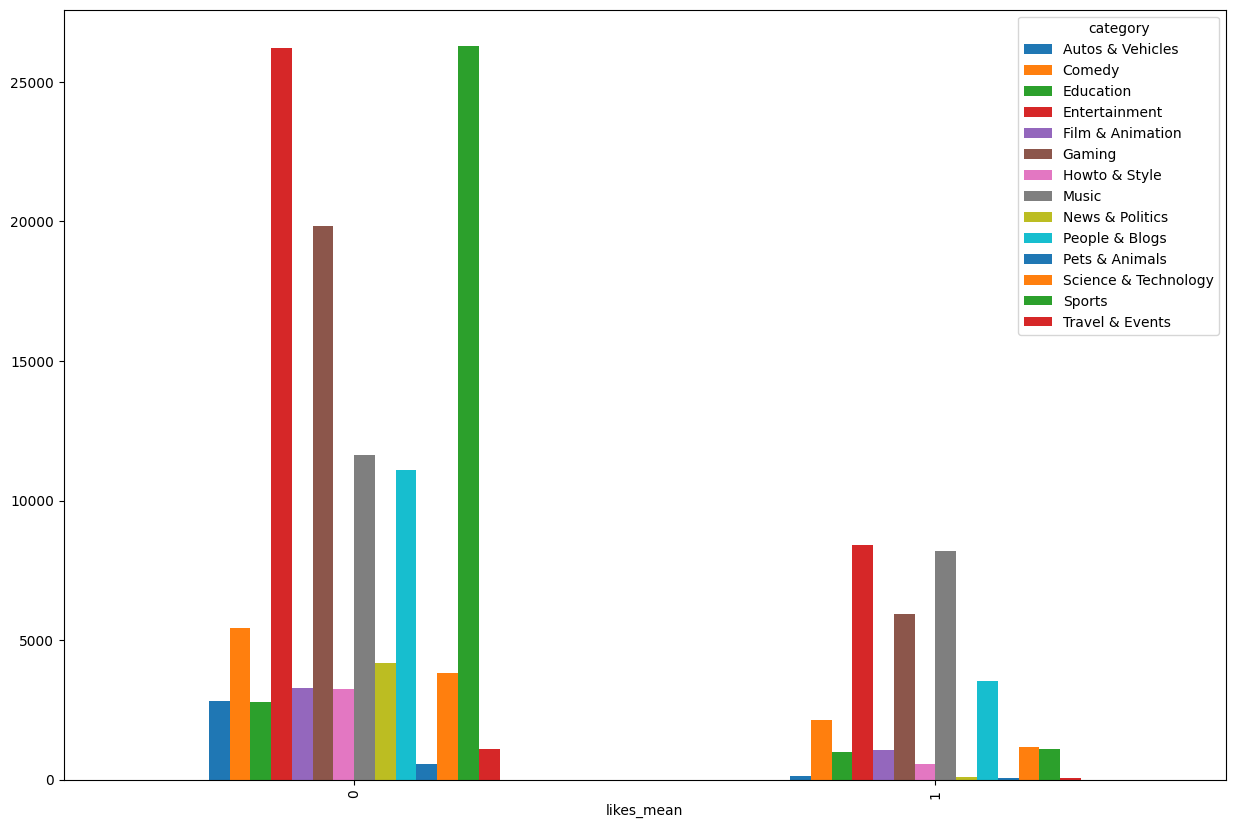

In [ ]:
#plot graph between likes_mean and category
df_ob3.groupby(['likes_mean','category']).size().unstack().plot(kind='bar',stacked=False,figsize=(15,10))

In [ ]:
df_ob3['likes'].quantile(0.25)


12199.0

In [ ]:
df_ob3['likes'].quantile(0.5)

37386.0

In [ ]:
df_ob3['likes'].mean()

122543.69637491333

In [ ]:
df_ob3['likes_50'] = (df_ob3['likes'] > df_ob3['likes'].quantile(.5)).astype(int)
df_ob3.head()

,title,publishedAt,categoryId,trending_date,view_count,likes,dislikes,category,likes_mean,likes_50
0,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,24,2020-08-12T00:00:00Z,2038853,353790,2628,Entertainment,1,1
1,TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS',2020-08-11T20:00:45Z,27,2020-08-12T00:00:00Z,236830,16423,209,Education,0,0
2,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,20,2020-08-12T00:00:00Z,2381688,146739,2794,Gaming,1,1
3,Nines - Clout (Official Video),2020-08-10T18:30:28Z,24,2020-08-12T00:00:00Z,613785,37567,669,Entertainment,0,1
4,i don't know what im doing anymore,2020-08-11T20:24:34Z,22,2020-08-12T00:00:00Z,940036,87113,1860,People & Blogs,0,1


<Axes: xlabel='likes_50'>

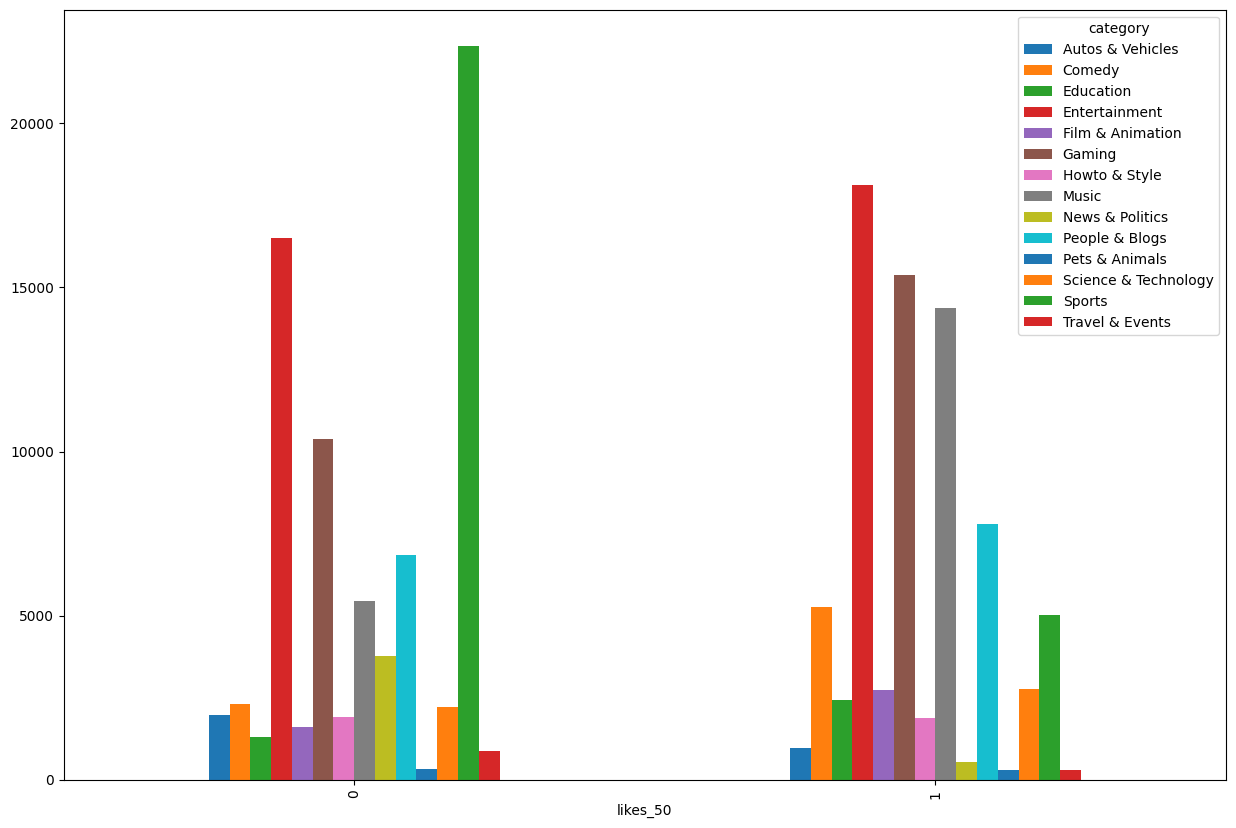

In [ ]:
df_ob3.groupby(['likes_50','category']).size().unstack().plot(kind='bar',stacked=False,figsize=(15,10))

In [ ]:
df_ob3['view_count_mean'] = (df_ob3['view_count'] > df_ob3['view_count'].mean()).astype(int)
df_ob3.head()

,title,publishedAt,categoryId,trending_date,view_count,likes,dislikes,category,likes_mean,likes_50,view_count_mean
0,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,24,2020-08-12T00:00:00Z,2038853,353790,2628,Entertainment,1,1,0
1,TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS',2020-08-11T20:00:45Z,27,2020-08-12T00:00:00Z,236830,16423,209,Education,0,0,0
2,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,20,2020-08-12T00:00:00Z,2381688,146739,2794,Gaming,1,1,1
3,Nines - Clout (Official Video),2020-08-10T18:30:28Z,24,2020-08-12T00:00:00Z,613785,37567,669,Entertainment,0,1,0
4,i don't know what im doing anymore,2020-08-11T20:24:34Z,22,2020-08-12T00:00:00Z,940036,87113,1860,People & Blogs,0,1,0


In [ ]:
df_ob3['view_count_50'] = (df_ob3['view_count'] > df_ob3['view_count'].quantile(.5)).astype(int)
df_ob3.head()

,title,publishedAt,categoryId,trending_date,view_count,likes,dislikes,category,likes_mean,likes_50,view_count_mean,view_count_50
0,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,24,2020-08-12T00:00:00Z,2038853,353790,2628,Entertainment,1,1,0,1
1,TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS',2020-08-11T20:00:45Z,27,2020-08-12T00:00:00Z,236830,16423,209,Education,0,0,0,0
2,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,20,2020-08-12T00:00:00Z,2381688,146739,2794,Gaming,1,1,1,1
3,Nines - Clout (Official Video),2020-08-10T18:30:28Z,24,2020-08-12T00:00:00Z,613785,37567,669,Entertainment,0,1,0,0
4,i don't know what im doing anymore,2020-08-11T20:24:34Z,22,2020-08-12T00:00:00Z,940036,87113,1860,People & Blogs,0,1,0,1


In [ ]:
df_ob3['view_count_25'] = (df_ob3['view_count'] > df_ob3['view_count'].quantile(.25)).astype(int)
df_ob3.head()


,title,publishedAt,categoryId,trending_date,view_count,likes,dislikes,category,likes_mean,likes_50,view_count_mean,view_count_50,view_count_25
0,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,24,2020-08-12T00:00:00Z,2038853,353790,2628,Entertainment,1,1,0,1,1
1,TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS',2020-08-11T20:00:45Z,27,2020-08-12T00:00:00Z,236830,16423,209,Education,0,0,0,0,0
2,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,20,2020-08-12T00:00:00Z,2381688,146739,2794,Gaming,1,1,1,1,1
3,Nines - Clout (Official Video),2020-08-10T18:30:28Z,24,2020-08-12T00:00:00Z,613785,37567,669,Entertainment,0,1,0,0,1
4,i don't know what im doing anymore,2020-08-11T20:24:34Z,22,2020-08-12T00:00:00Z,940036,87113,1860,People & Blogs,0,1,0,1,1


In [ ]:
#drop_columns = df_ob3['view_count_23']

In [ ]:
df_ob3.head()

,title,publishedAt,categoryId,trending_date,view_count,likes,dislikes,category,likes_mean,likes_50,view_count_mean,view_count_50,view_count_25
0,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,24,2020-08-12T00:00:00Z,2038853,353790,2628,Entertainment,1,1,0,1,1
1,TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS',2020-08-11T20:00:45Z,27,2020-08-12T00:00:00Z,236830,16423,209,Education,0,0,0,0,0
2,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,20,2020-08-12T00:00:00Z,2381688,146739,2794,Gaming,1,1,1,1,1
3,Nines - Clout (Official Video),2020-08-10T18:30:28Z,24,2020-08-12T00:00:00Z,613785,37567,669,Entertainment,0,1,0,0,1
4,i don't know what im doing anymore,2020-08-11T20:24:34Z,22,2020-08-12T00:00:00Z,940036,87113,1860,People & Blogs,0,1,0,1,1


<Axes: xlabel='view_count_mean'>

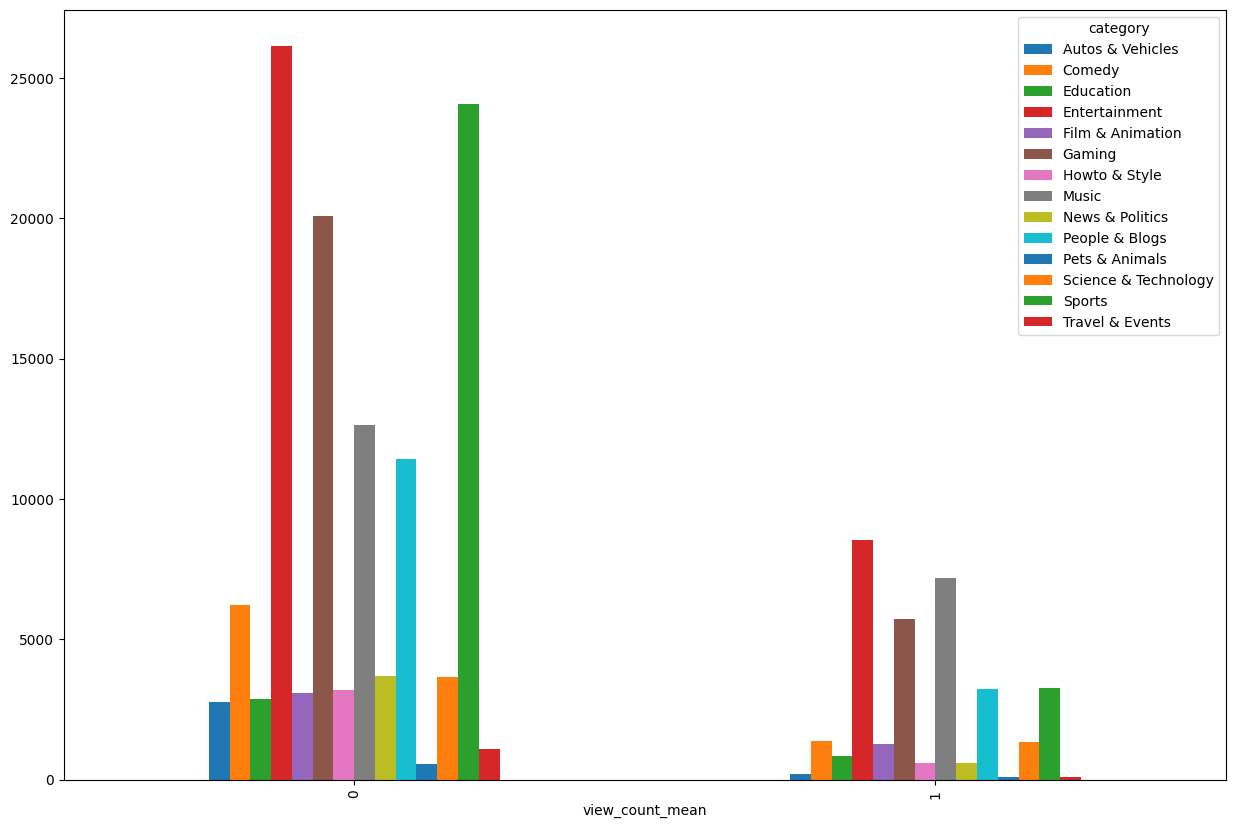

In [ ]:
df_ob3.groupby(['view_count_mean','category']).size().unstack().plot(kind='bar',stacked=False,figsize=(15,10))

<Axes: xlabel='view_count_50'>

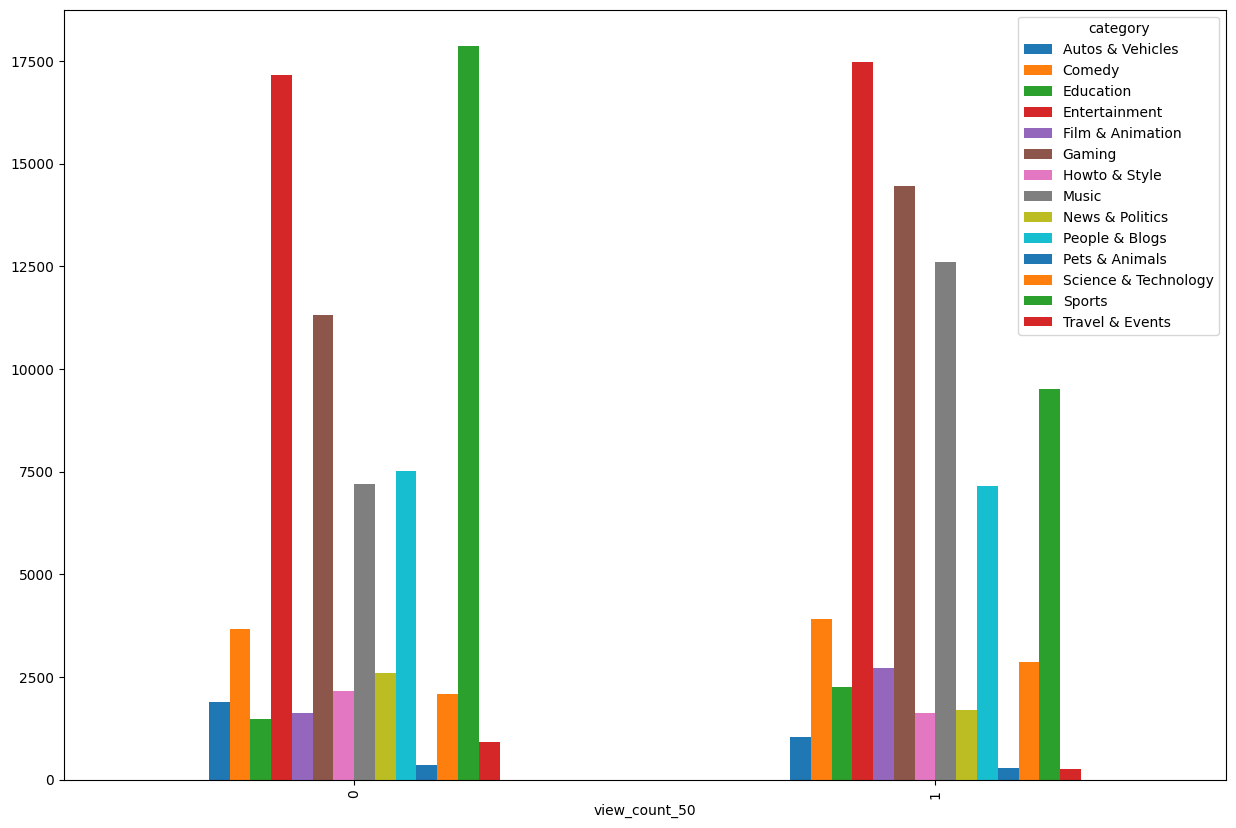

In [ ]:
df_ob3.groupby(['view_count_50','category']).size().unstack().plot(kind='bar',stacked=False,figsize=(15,10))

<Axes: xlabel='view_count_25'>

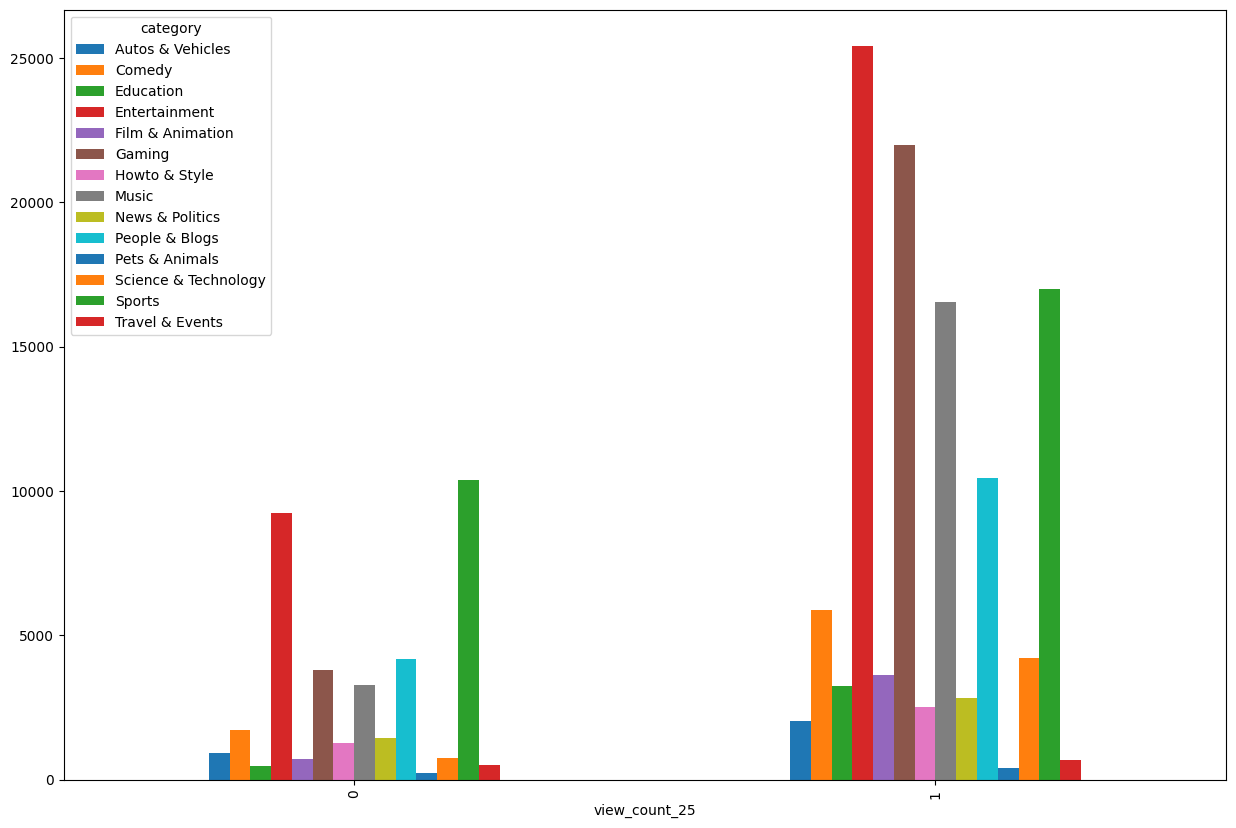

In [ ]:
df_ob3.groupby(['view_count_25','category']).size().unstack().plot(kind='bar',stacked=False,figsize=(15,10))

In [ ]:
#find the ratio of view_count to likes
df_ob3['view_to_like_ratio'] = df_ob3['view_count']/df_ob3['likes']
df_ob3['like_to_view_ratio'] = df_ob3['likes']/df_ob3['view_count']
df_ob3.head()

,title,publishedAt,categoryId,trending_date,view_count,likes,dislikes,category,likes_mean,likes_50,view_count_mean,view_count_50,view_count_25,view_to_like_ratio,like_to_view_ratio
0,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,24,2020-08-12T00:00:00Z,2038853,353790,2628,Entertainment,1,1,0,1,1,5.762890,0.173524
1,TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS',2020-08-11T20:00:45Z,27,2020-08-12T00:00:00Z,236830,16423,209,Education,0,0,0,0,0,14.420630,0.069345
2,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,20,2020-08-12T00:00:00Z,2381688,146739,2794,Gaming,1,1,1,1,1,16.230777,0.061611
3,Nines - Clout (Official Video),2020-08-10T18:30:28Z,24,2020-08-12T00:00:00Z,613785,37567,669,Entertainment,0,1,0,0,1,16.338409,0.061205
4,i don't know what im doing anymore,2020-08-11T20:24:34Z,22,2020-08-12T00:00:00Z,940036,87113,1860,People & Blogs,0,1,0,1,1,10.790996,0.092670


<Axes: >

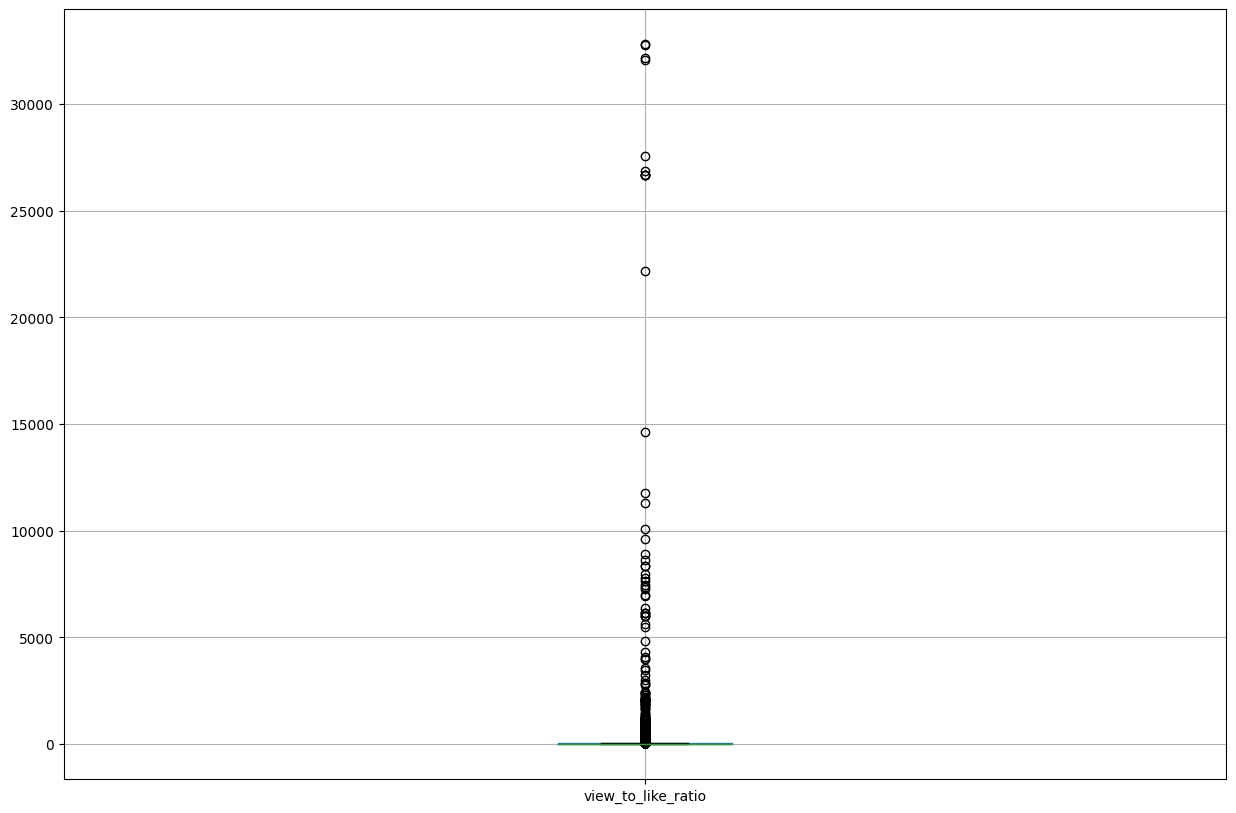

In [ ]:
#plot a boxplot to show the spread of the view_to_like_ratio
df_ob3.boxplot(column='view_to_like_ratio', figsize=(15,10))

<Axes: >

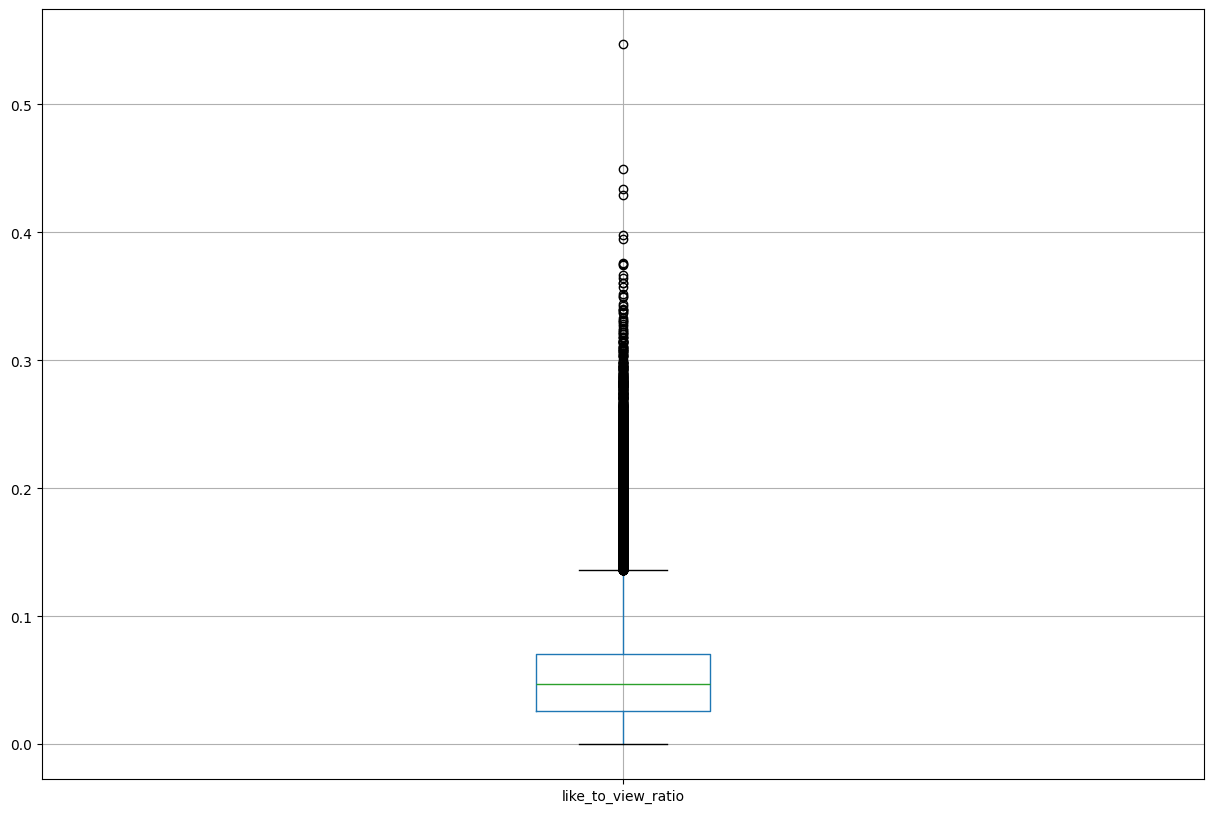

In [ ]:
df_ob3.boxplot(column='like_to_view_ratio', figsize=(15,10))

Shows why we neglected dislikes -> the API doesnt register dislikes after 2022 

<Axes: xlabel='date'>

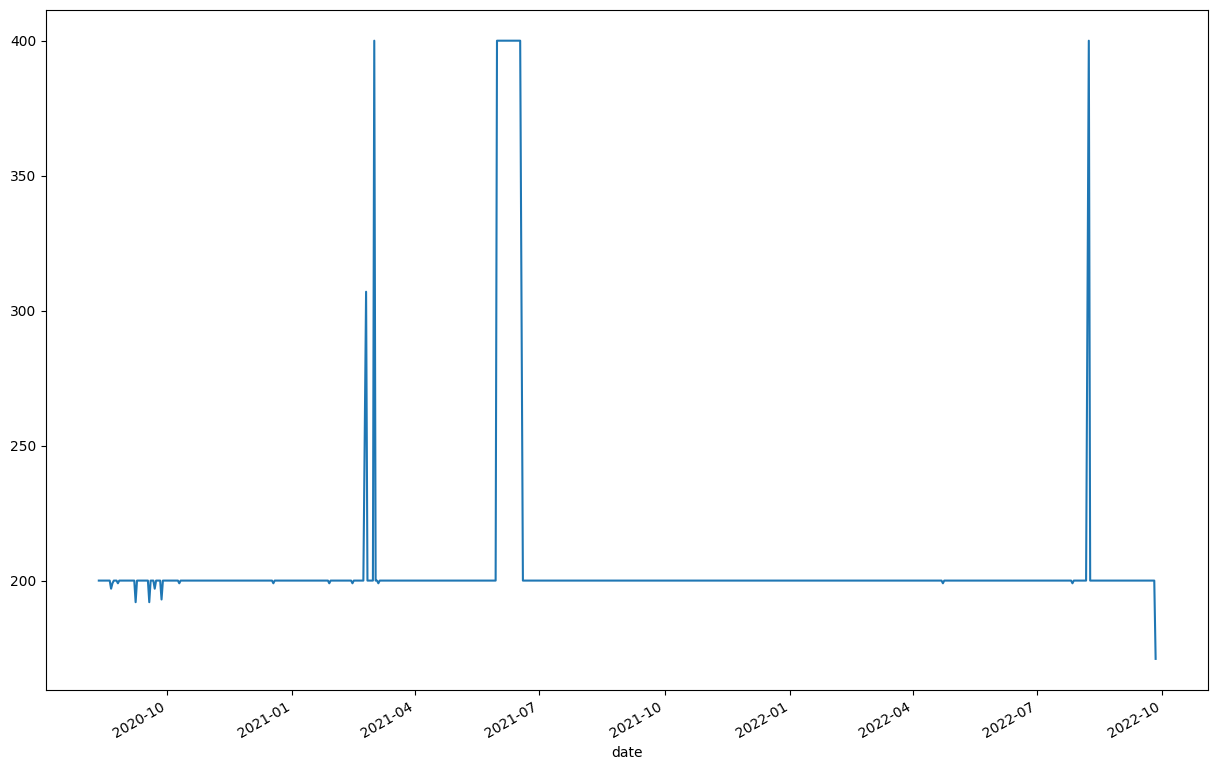

In [ ]:
#create a new dataframe where videos with dislikes equal to zero is 1 and else is 0
df_test = df.copy()
df_test['dislikes_zero'] = df['dislikes'].apply(lambda x: 1 if x == 0 else 0)
df_test.head()

#plot line graph between dislikes_zero == 1 and date
#df_test.groupby(['date','dislikes_zero']).size().groupby(level=0).sum().plot(kind='line',figsize=(15,10))

#show that the number of dislikes reaches zero for the entire date range using plot
df_test.groupby(['date','dislikes_zero']).size().groupby(level=0).sum().plot(kind='line',figsize=(15,10))


#### _Comment on previous cell output (optional)_
_The output from the previous cell is very interesting._

_The following cell defines a visualisation function for the data._

In [ ]:
def fridge_sorted_bar(color='blue'):
    df.sort_values(0).plot.bar( color=color)   

###  _More code cells_
_You can add as many code cells as you require, but it is
recommended that you break code into relatively small chunks and
do not exceed the maximum number of lines stated above._

# Project Outcome (10 + 10 marks)

_This section should describe the outcome of the project by means of both explanation of the results and by graphical visualisation in the form of graphs, charts or or other kinds of diagram_

_The section should begin with a general overview of the results and then have a section for each of the project objectives. For each of these objectives an explanation of more specific results relating to that objective shoud be given, followed by a section presenting some visualisation of the results obtained. (In the case where
the project had just one objective, you should still have a section describing
the results from a general perspective followed by a section that focuses on
the particular objective.)_

_The marks for this section will be divided into 10 marks for Explanation
and 10 marks for Visualisation. These marks will be awarded for the Project Outcome
section as a whole, not for each objective individually. Hence, you do not
have to pay equal attention to each. However, you are expected to have a
some explanation and visualisation for each. It is suggested you have
200-400 words explanation for each objective._

## Overview of Results
_Give a general overview of the results (around 200 words)._

# Objective 1
Visualize the Genres that trend in the United Kingdom.
We take the dataset of the trending videos in the UK. We first wanted to plot a graph that gives us which category trends the most. So, in Figure 1, we can see that Entertainment category tops the list, while Sports, Gaming, Music and People & Blogs categories follows the ranking. We should also note that this is a cumulative sum of the no. of videos from Aug 2020 to Nov 2023. 

As it is for 3 years, we wanted to further investigate if this trend has remained the same for the entire dataset, month-wise. Thus, in Figure 2, we plotted a Stacked Bar plot, which gives the total number of values for each month (cumulative of years) across all the category stacked on top of each other. As we can see that in the Month of October, there is a spike in number of videos trending, followed by September and August across the years. The least number of videos trending is in the month of February.

We also can see from the plot that the top five categories in Figure 1 (in Entire Dataset) are the same top categories in Figure 2 (month-wise) as well. Thus, we further deep dive into further investigating the top five categories (year-wise) in detail. Hence, in Figure 3, we discover that it has the highest values as expected, but we deduce two conclusions:
1. In the year 2020, we see the number of the bins in the plot is comparatively very smaller than that of other bins. This is mainly because, we only have the data for the last 5 months of the year 2020 (i.e. August to December 2020).
2. We also notice a change in trend, across 2021 to 2023, where the videos in gaming category is more trending, while the Entertainment and People & Blog categories are decreasing year-by-year. Sports and Music categories stay in almost similar trend. 


# Objective 2


# Objective 3

# Objective 4

# Conclusion (5 marks)

_Your concluding section should be around 200-400 words. It is recommended
that you divide it into the following sections._

### Achievements
_As we had expected, the most popular fridge magnets were of the 'meme' kind.
We were surprised that 'smiley' fridge magnets were less common than expected.
We conjecture that this is because, although they are apparently very popular,
few fridges display more than one smiley. However, 'meme' based magnets can
be found in large numbers, even on quite small fridges._

### Limitations

_The project was limited to a small number of fridge magents, which may not be
typical of fridges found in the global fridge magnet ecosystem._

### Future Work

_In future work we would like to obtain more diverse data and study fridge magnets 
beyond the limited confines of student accomodation. We hypothesise that there
could be a link between fridge magnet types and social class and/or educational
achievement._